In [27]:
import pandas as pd
import numpy as np

In [28]:
labels = pd.read_csv("labels.csv")
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [29]:
labels = labels[(labels.breed == 'beagle') | (labels.breed =='chihuahua') | (labels.breed == 'doberman') | (labels.breed == 'french_bulldog') | (labels.breed =='golden_retriever') | (labels.breed =='malamute') | (labels.breed =='pug') | (labels.breed =='saint_bernard') | (labels.breed =='scottish_deerhound') | (labels.breed =='tibetan_mastiff')]

In [30]:
labels["breed"].value_counts()

scottish_deerhound    126
beagle                105
pug                    94
saint_bernard          84
malamute               81
doberman               74
chihuahua              71
french_bulldog         70
tibetan_mastiff        69
golden_retriever       67
Name: breed, dtype: int64

In [31]:
labels["id"] = labels["id"].apply(lambda x:   x + ".jpg")

C:\Users\Utkarsh\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
labels.reset_index()


,index,id,breed
0,4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
1,9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
2,20,008b1271ed1addaccf93783b39deab45.jpg,doberman
3,25,00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
4,37,0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever
...,...,...,...
836,10158,fe50bac6c389d137ea01c9cfc7346ca8.jpg,scottish_deerhound
837,10161,fe624532170510bd80627c0500bafc97.jpg,tibetan_mastiff
838,10170,feb16cf86c9dac6d476e3c372ba5c279.jpg,pug
839,10172,febcab8eb2da444bf83336cffec7eb92.jpg,golden_retriever


In [33]:
labels = labels.reset_index()

In [34]:
labels =labels.drop('index', axis =1 )

In [35]:
labels['id'] = labels['id'].apply(lambda x: f"train\{x}")


In [36]:
labels

,id,breed
0,train\0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
1,train\0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
2,train\008b1271ed1addaccf93783b39deab45.jpg,doberman
3,train\00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
4,train\0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever
...,...,...
836,train\fe50bac6c389d137ea01c9cfc7346ca8.jpg,scottish_deerhound
837,train\fe624532170510bd80627c0500bafc97.jpg,tibetan_mastiff
838,train\feb16cf86c9dac6d476e3c372ba5c279.jpg,pug
839,train\febcab8eb2da444bf83336cffec7eb92.jpg,golden_retriever


In [37]:
import cv2
import matplotlib.pyplot as plt


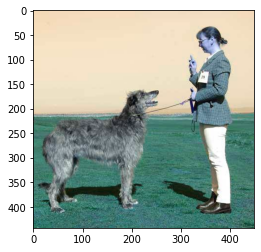

In [38]:
plt.imshow(cv2.imread(labels.id[5]))

In [39]:
labels = labels.drop(1)
labels.head()

,id,breed
0,train\0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
2,train\008b1271ed1addaccf93783b39deab45.jpg,doberman
3,train\00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
4,train\0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever
5,train\01e787576c003930f96c966f9c3e1d44.jpg,scottish_deerhound


In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(labels, test_size =0.2)



In [41]:
train

,id,breed
260,train\4e475f0d2f1808216a28e2f635c17297.jpg,beagle
83,train\19fd98408baa882087628bdf39d9d98c.jpg,malamute
769,train\ea6c7f6e749d8aa9512054c47585e298.jpg,doberman
268,train\50fcbd042ae9a24e3afd5cbb8e1e4542.jpg,doberman
243,train\4a29719db06ab8bd56fefc72428bb53b.jpg,saint_bernard
...,...,...
210,train\421c361f6c00771321442a149efc8d62.jpg,doberman
787,train\eeb4aa1fdbefcc783845be89b94bdab9.jpg,beagle
334,train\664fcdf9528464aee007c046919b006e.jpg,chihuahua
815,train\f76f9724c66f6b62edc1ac44fecaa27d.jpg,golden_retriever


In [42]:
test

,id,breed
254,train\4cd0556f7cadb4f40b7dfa2d2796b5e1.jpg,doberman
275,train\5335f60de809010c1e01de557d8b19f8.jpg,chihuahua
694,train\d476405a5ee545d4acc5d6840d7b2054.jpg,malamute
372,train\71ca356b09297d337b681c5f2ce57649.jpg,saint_bernard
59,train\13863e32053e9735b55ba975ecd58cfd.jpg,malamute
...,...,...
149,train\2da57398c5baadadfc42a16e4905ae96.jpg,french_bulldog
756,train\e68b9b319d716e7c3d927a823c99f6db.jpg,beagle
466,train\8b27fd53a34c667b41ec5cf13be22de6.jpg,scottish_deerhound
204,train\412b82b8d22d227bd6938aa7884ac56b.jpg,tibetan_mastiff


In [48]:
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
model = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94773248/94765736 [==============================] - 71s 1us/step


In [50]:
x = model.output
x = Flatten()(x)
x=Dropout(0.35)(x)
x=Dense(units=1000,activation='relu')(x)
x=Dropout(0.8)(x)
x=Dense(units=750,activation='relu')(x)
x=Dropout(0.8)(x)
x=Dense(units=1000,activation='relu')(x)
x=Dropout(0.8)(x)
predictions = Dense(10, activation='softmax')(x)


In [53]:
from tensorflow import keras

In [54]:
main_model = Model(inputs=model.input, outputs=predictions)

#train only the hidden layers and output layer, donot train the resnet model
for curLayer in model.layers:
    curLayer.trainable = False
    
main_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
main_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [55]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
#check class_mode in keras documentation https://keras.io/preprocessing/image/
training_set = train_datagen.flow_from_dataframe(
        train,
        x_col = 'id',
        y_col = 'breed',
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_set = test_datagen.flow_from_dataframe(
        test,
        x_col = 'id',
        y_col = 'breed',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')



Found 672 validated image filenames belonging to 10 classes.
Found 168 validated image filenames belonging to 10 classes.


In [59]:
main_model.fit(
        training_set,
        epochs=20,
        validation_data=test_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 34 steps, validate for 17 steps
Epoch 1/20
34/34 [==============================] - 397s 12s/step - loss: 6.5925 - accuracy: 0.0938 - val_loss: 2.3072 - val_accuracy: 0.0952
Epoch 2/20
34/34 [==============================] - 393s 12s/step - loss: 5.0071 - accuracy: 0.1310 - val_loss: 2.3002 - val_accuracy: 0.1369
Epoch 3/20
34/34 [==============================] - 394s 12s/step - loss: 4.2689 - accuracy: 0.1295 - val_loss: 2.2990 - val_accuracy: 0.1369
Epoch 4/20
34/34 [==============================] - 390s 11s/step - loss: 4.0097 - accuracy: 0.1429 - val_loss: 2.2983 - val_accuracy: 0.1369
Epoch 5/20
34/34 [==============================] - 391s 11s/step - loss: 4.3435 - accuracy: 0.1339 - val_loss: 2.2978 - val_accuracy: 0.1369
Epoch 6/20
34/34 [==============================] - 393s 12s/step - loss: 4.3821 - accuracy: 0.1473 - val_loss: 2.2975 - val_accuracy: 0.1369
Epoch 7/20
34/34 [==============================] - 393s

In [60]:
training_set.class_indices


{'beagle': 0,
 'chihuahua': 1,
 'doberman': 2,
 'french_bulldog': 3,
 'golden_retriever': 4,
 'malamute': 5,
 'pug': 6,
 'saint_bernard': 7,
 'scottish_deerhound': 8,
 'tibetan_mastiff': 9}

In [64]:
ynew = main_model.predict_generator(test_set)


Instructions for updating:
Please use Model.predict, which supports generators.


In [66]:
ynew.shape

(168, 10)

In [88]:
ynew

array([[0.12302753, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695],
       [0.12302753, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695],
       [0.12302753, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695],
       ...,
       [0.12302753, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695],
       [0.12302754, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695],
       [0.12302754, 0.08386282, 0.08967242, ..., 0.10500019, 0.14400437,
        0.07919695]], dtype=float32)

In [95]:
y_new= pd.DataFrame(ynew, columns = ['beagle','chihuahua', 'doberman','french_bulldog','golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff'])
y_new

,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
1,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
2,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
3,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
4,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
...,...,...,...,...,...,...,...,...,...,...
163,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
164,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
165,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197
166,0.123028,0.083863,0.089672,0.080019,0.079579,0.103516,0.112122,0.105,0.144004,0.079197


In [91]:
y_test

,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
254,0,0,1,0,0,0,0,0,0,0
275,0,1,0,0,0,0,0,0,0,0
694,0,0,0,0,0,1,0,0,0,0
372,0,0,0,0,0,0,0,1,0,0
59,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,1,0,0,0,0,0,0
756,1,0,0,0,0,0,0,0,0,0
466,0,0,0,0,0,0,0,0,1,0
204,0,0,0,0,0,0,0,0,0,1


In [89]:
ytest.shape

(168, 10)

In [76]:
ytest =y_test.to_numpy()

In [79]:
from sklearn.metrics import confusion_matrix


In [80]:
matrix = confusion_matrix(ytest.argmax(axis=1), ynew.argmax(axis=1))


In [81]:
matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0]], dtype=int64)

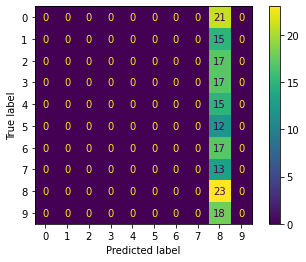

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix= matrix)
disp.plot()